# Training and Testing on the Real-world Data

## Importing Dependencies

In [413]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB

## Load Data

In [414]:
# Load new data with addtional realtime data of user with subject id 31.
df = pd.read_csv(r'D:\Dataset\2020-03-13\Untitled Folder\data_for_testing.csv', index_col=None)
df.head()
df.tail()
df.describe()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyGyromeanX,tBodyGyromeanY,tBodyGyromeanZ,subject_id
count,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000,4872.000000
mean,0.264804,-0.024246,-0.117693,-0.041157,-0.066931,0.075895,16.219622
std,0.233493,0.220502,0.194817,0.293583,0.186248,0.165768,9.195062
min,-2.690703,-2.770156,-2.737031,-2.576875,-1.000000,-0.902860,1.000000
25%,0.227334,-0.035884,-0.136319,-0.173880,-0.158673,0.022368,8.000000
50%,0.273955,-0.019023,-0.111437,-0.032013,-0.073248,0.083989,16.000000
75%,0.322771,-0.002077,-0.084654,0.092652,0.020336,0.137396,24.000000
max,2.548359,2.161641,1.767969,1.330234,0.867266,0.937352,31.000000


In [415]:
df.tail()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyGyromeanX,tBodyGyromeanY,tBodyGyromeanZ,subject_id,activity_label
4867,-0.295625,0.858984,1.289922,-0.332109,0.139609,0.031719,31,WALKING
4868,2.368359,-0.118359,0.873203,-0.152578,0.191250,0.051719,31,WALKING
4869,1.100937,-1.361094,-0.526719,-0.018672,0.041016,0.288984,31,WALKING
4870,-1.327656,-1.121484,-1.628594,-0.390547,-0.222266,0.269531,31,WALKING
4871,-1.630000,0.203437,-0.924844,0.279375,-0.259219,0.289531,31,WALKING


## Spliting Features and Labels

In [416]:
X = df.iloc[:,:-2]
y = df.iloc[:,-2]
y.unique()
# list(X.columns)

array([ 1,  3,  5,  6,  7,  8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26,
       27, 28, 29, 30,  2,  4,  9, 10, 12, 13, 18, 20, 24, 31],
      dtype=int64)

## Applying PCA

In [417]:
from sklearn.decomposition import PCA

# Apply PCA to the training and test data separately
pca = PCA(n_components=6) # Choosing 6 number of components to retain
df_pca = pca.fit_transform(df[list(df.columns[:-1])])

# Convert the PCA transformed data into a dataframe
X = pd.DataFrame(df_pca, columns=[f"PC{i+1}" for i in range(pca.n_components_)])

In [418]:
X.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,15.219278,0.495775,-0.041350,0.038873,0.001875,-0.061819
1,15.219824,-0.209824,0.051484,0.021864,0.049840,-0.050049
2,15.219885,-0.281492,0.070870,-0.056787,0.059264,-0.076186
3,15.219807,-0.155072,-0.011627,-0.008594,0.093027,0.026229
4,15.219515,-0.006660,0.033381,0.029551,0.003779,0.064546


## train test split

In [419]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,stratify=y)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3410, 6)
(1462, 6)
(3410,)
(1462,)


## Applying Navie Bayes classification

In [420]:
"""Training the model with additional Real world data with subject ID 31."""

'Training the model with additional Real world data with subject ID 31.'

In [421]:
from sklearn.preprocessing import StandardScaler
# Standardizing the Data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Naive Bayes test accuracy score:  1.0
Naive Bayes train accuracy score:  1.0


Text(69.0, 0.5, 'Truth')

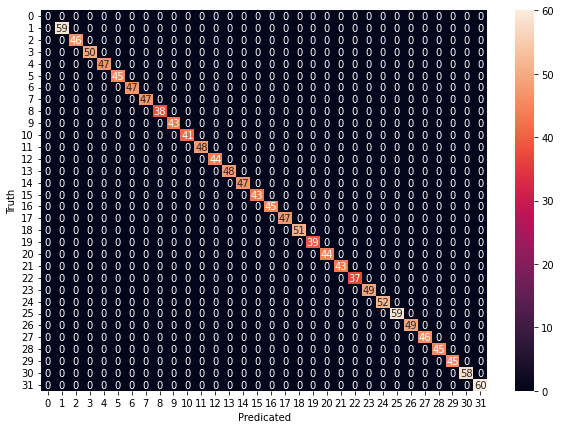

In [422]:
nb= GaussianNB()
nb.fit(x_train, y_train)
print("Naive Bayes test accuracy score: ",nb.score(x_test, y_test))
print("Naive Bayes train accuracy score: ",nb.score(x_train, y_train))

preds5 = nb.predict(x_test)
cm = tf.math.confusion_matrix(labels=y_test,predictions=preds5)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicated')
plt.ylabel('Truth')

## Testing the Model on Real World data

In [423]:
# loading user generated data with subject_id 31.
test_input_data = pd.read_csv('test_input_data.csv',index_col=None)
test_input_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.290586,1.298209,0.149169,0.368897,0.029282,0.054873
1,-0.318320,1.969425,1.243563,0.410254,0.034710,-0.034482
2,2.143280,-0.545909,1.277312,-0.430811,-0.154395,-0.160471
3,2.122603,-1.234726,-0.209543,0.790420,0.529122,-0.433921
4,-1.442930,-1.184292,-0.708963,0.070367,0.640229,-0.295906


### Prediction Function 

In [425]:
def Prediction(input_data):
    """This function takes the input_data as pandas dataframe and returns the predicted subject_ID"""
    
    # Standardizing the Data
    sc = StandardScaler()
    input_data = sc.fit_transform(input_data)
    
    outputList = []
    for i in range(len(test_inputs)):
        outputList.append(nb.predict(input_data[i].reshape(1, -1)))
        
    outputDict = {}
    for i in outputList:
        if list(i)[0] in outputDict.keys():
            outputDict[list(i)[0]] += 1
        else:
            outputDict[list(i)[0]] = 1
    
    predicted_Subject_id = max(outputDict, key= lambda x: outputDict[x])
    
    return predicted_Subject_id

In [426]:
print(f"The predicted subject_id is: {Prediction(test_input_data)}")

The predicted subject_id is: 31
